<a href="https://colab.research.google.com/github/FatimaMHelmy/Head-pose-estimation-using-ML-/blob/main/Copy_of_FACE_POSES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REFERENCES 
1: TO KNOW MORE ABOUT Euler angles CHECK THIS [Head Pose Estimation Using Geometric Model](https://medium.com/@rajilini/head-pose-estimation-using-geometric-model-25e4040b6f60)

2: TO KNOW MORE ABOUT Pose Estimation Models CHECK >>

> [Top 9 Pose Estimation Models of 2022](https://medium.com/augmented-startups/top-9-pose-estimation-models-of-2022-70d00b11db43)

>[Head Pose Estimation using Python](https://towardsdatascience.com/head-pose-estimation-using-python-d165d3541600)


# Installatin
> ####  [Media pipe](https://google.github.io/mediapipe/solutions/face_mesh.html) is an open-source cross-platform framework for building multimodel machine learning pipelines.


In [105]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 21.9 MB/s eta 0:00:00


# DISCOVER YOUR PROBLEM FIRST 
## Since the face of a person can rotate over all three axis — but with some limitations, of course.  *We want to detect theses movments Using ML MODEL *.We call these movements the Euler Angles (Roll, Pitch, and Yaw)..|| for mathmatican information check this article >>[Real-Time Head Pose Estimation With OpenCV and Dlib](https://medium.com/analytics-vidhya/real-time-head-pose-estimation-with-opencv-and-dlib-e8dc10d62078)
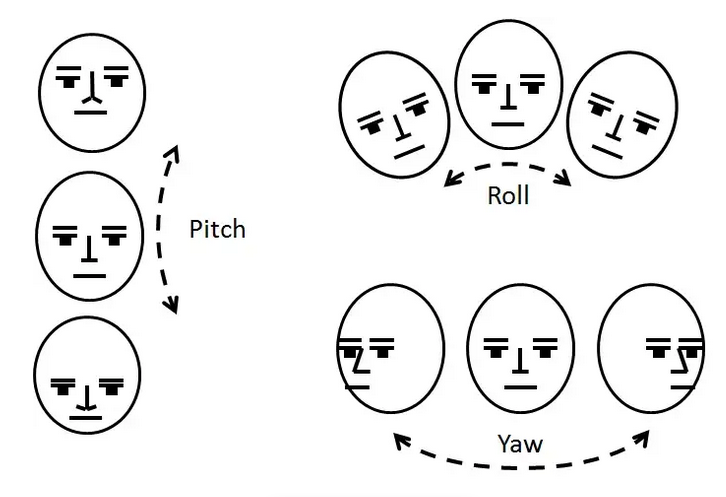

### You need the 2D (x,y) locations of a few points in the image. In the case of a face, you  will use the tip of the nose, the chin, the left corner of the left eye, the right corner of the right eye, the left corner of the mouth, and the right corner of the mouth.
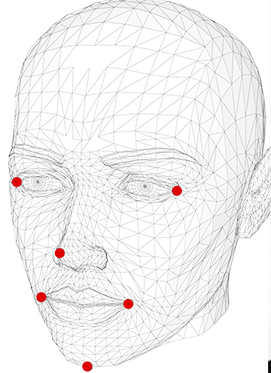

# Preparing Dataset for Pose Estimation
**we are using [AFLW2000](https://paperswithcode.com/dataset/aflw2000-3d)**

AFLW2000-3D is a dataset of 2000 images that have been annotated with image-level 68-point 3D facial landmarks. This dataset is used for evaluation of 3D facial landmark detection models. The head poses are very diverse and often hard to be detected by a CNN-based face detector.

#### link for download the data
### http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip



### We have first imported the necessary libraries that will help in creating the dataset. Then in the next four lines, we are importing the modules required to extract key points and their draw utils.



> ### I chossed MediaPipe Face Mesh which depends on BLAZE FACE MODEL ,(one of the best 9 models for pose detection), for extarcting the key points   || for mor information chech this >>  [ MediaPipe Face Mesh](https://google.github.io/mediapipe/solutions/face_mesh.html)



### Load the libraries

In [106]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os 
from os import path 
import scipy.io as sio  # to read the mat file in the data 

### In the above snippet of code, we have first imported the necessary libraries that will help in creating the dataset. Then in the next lines, we are importing the modules required to extract key points and their draw utils. 
>>  The FaceMesh object from the Mediapipe library. This object will detect faces and also detect keypoints from one or more faces.

>>  The VideoCapture object from the OpenCV library. This object will be used for retrieving images from the webcam. We set a parameter on the object with 0 for retrieving images from the webcam.





In [2]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
cap = cv2.VideoCapture(0) 

NameError: ignored

In [ ]:
while cap.isOpened():
  _,image = cap.read()
  cv2.namedWindow("Input")
  cv2.imshow("Input", image)

###!!!!!!!!!!!!! Google colab crashes if you try to display image using cv2.imshow() instead import from g::oogle.colab.patches import cv2_imshow and display using cv2_imshow(<image>)

In [ ]:
from google.colab.patches import cv2_imshow    


####  For your information, the OpenCV and the Mediapipe library read their image differently.

On the OpenCV library, the image is in BGR color space. Meanwhile, the mediapipe library needs an image with RGB color space.

Therefore, we need to convert the color space to RGB first, apply face landmark detection, then convert it back to BGR color space.

In [104]:
## this function takes the image path and return it's keypoints 
def get_results(img_path): 
      # Read the image 
      ## check first if this img exist or not 
  if os.path.isfile(img_path):    
    image = cv2.imread(img_path)
        # Convert the color space from BGR to RGB
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance
    image.flags.writeable = False

        # Get the results [it contains all the landmarks and thire dimentions  ]
    results = face_mesh.process(image)

        # To improve performance
    image.flags.writeable = True

        # Convert the color space from RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if (results.multi_face_landmarks) != None:
      return(results,image)
    else:
      return(None , None )  

  else:
    return(None , None )    

### let's make sure that we selected the correct points. 

In [ ]:
## selected six points indexs 
landmarks_indx=[33,263,1,61,291,199]
## loop to get points dimentions (x,y)
results,image=get_results('/content/img_4.png')
print(results)
#k=results.multi_face_landmarks
#print(results.multi_face_landmarks)
#print(results.multi_face_landmarks)
for key_point in results.multi_face_landmarks:
  for idx,landmark in enumerate(key_point.landmark):
    if idx in landmarks_indx:
      print(idx,landmark)
      x = landmark.x
      y = landmark.y
      # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
      shape = image.shape 
      relative_x = int(x * shape[1])
      relative_y = int(y * shape[0])
      cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=1)
      cv2.putText(image , str(idx) ,  (relative_x, relative_y), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (0, 0, 255), 1, cv2.LINE_AA)
cv2_imshow(image)



None


AttributeError: ignored

### **creat an empty dataset to store points  & eular angles in it**

In [ ]:
## selected six points 
points = [ "nose", "chin", "left corner of the left eye","right corner of the right eye",
          "left corner of the mouth", "right corner of the mouth"]
## empty list to store data header 
columns = []
for p in points:
        columns.append(p + "_x")
        columns.append(p + "_y") 
columns.append("pitch") 
columns.append("yaw") 
columns.append("roll") 
## the empty data set 
data = pd.DataFrame(columns = columns) 
data

,nose_x,nose_y,chin_x,chin_y,left corner of the left eye_x,left corner of the left eye_y,right corner of the right eye_x,right corner of the right eye_y,left corner of the mouth_x,left corner of the mouth_y,right corner of the mouth_x,right corner of the mouth_y,pitch,yaw,roll


### Read the images from the zip file and store their keypoints and Eular angles  in the empty data frame 
>> we have the images and their angles (stored in mat file)

#### I uploaded the file in my drive.

In [3]:
# connect with your drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## extract the zip file in your drive 
%%capture
!unzip /content/drive/MyDrive/DATA/AFLW2000-3D.zip -d /content/drive/MyDrive/DATA

## Fill our data frame with the points of each picture in AFLW2000 folder which stored in "/content/drive/MyDrive/DATA/AFLW2000"

In [ ]:
  ## selected six points indexs 
landmarks_indx={1:"nose", 61:"left corner of the mouth", 33:"left corner of the left eye",
                199:"chin", 263:"right corner of the right eye", 291:"right corner of the mouth"}

# assign directory of images and their matlap file 
directory = '/content/drive/MyDrive/DATA/AFLW2000'
 
# iterate over image_files in  that directory

# start of first loop 
for filename in os.listdir(directory):
  # creat empty dictionry to store points in it after appending them in the dataframe
    data_points = dict()
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
      img_path = os.path.join(directory, filename)
        ## call the function get_results to get the image points
      results,image = get_results(img_path)
  #  select required points and store them in data_points dictionary 
      if results != None : 
        ## loop to get points dimentions (x,y)
# start of second loop 
        for key_point in results.multi_face_landmarks:

          for idx,landmark in enumerate(key_point.landmark):

            if idx  in landmarks_indx.keys():
              x = landmark.x
              y = landmark.y

              ## append dimentions in the data frame 
              data_points[landmarks_indx[idx]+"_x"] , data_points[landmarks_indx[idx]+"_y"] = x, y

# end  of second loop 

        ## read matlap file which contains Eular angles
      mat_file = sio.loadmat(img_path[:-4]+'.mat')
        ## append eular angles  in the data_points dic  
      data_points["pitch"],data_points["yaw"],data_points["roll"] = mat_file["Pose_Para"][0][:3]
        ## append all  in the data frame 
      data = data.append(data_points,ignore_index=True)

# end of first loop 

## store the final_dataframe in csv file 
data.to_csv("/content/drive/MyDrive/DATA/final_data.csv")  



# **MODEL SELECTION**

Now we have created our dataset, we just have to pick a machine-learning algorithm to classify the poses. In this step, we will take an image, run the blaze pose model (that we used earlier for creating the dataset) to get the key points of the person present in that image, and run our model on that test case. The model is expected to give the correct results with a high confidence score. In this article, I am going to use the SVC(Support Vector Classifier) from the sklearn library to perform the classification task.
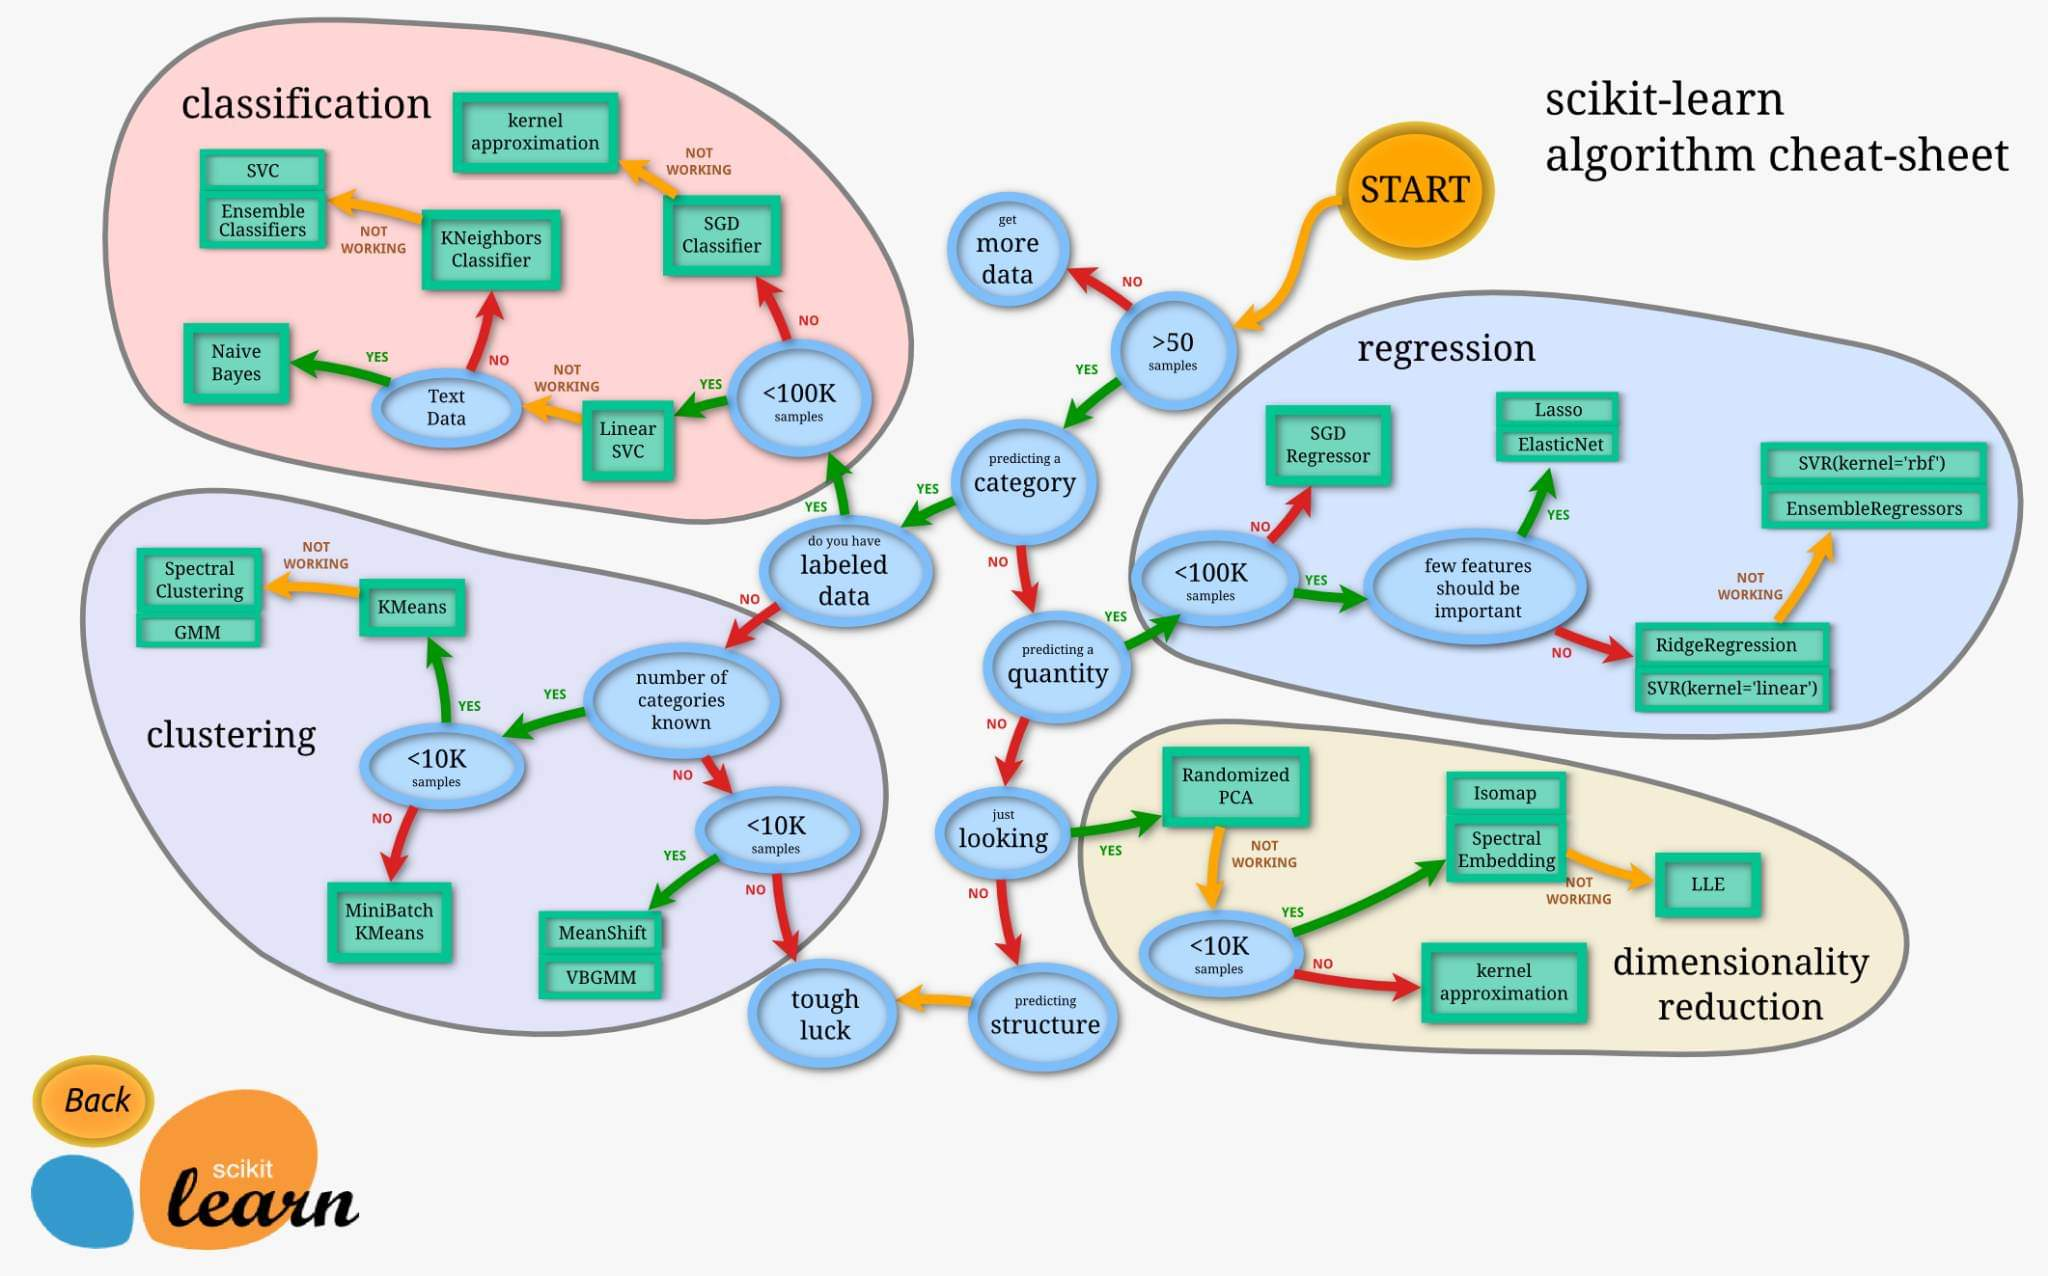

#**data preprocessing**

read the stored data 

In [5]:
face_data = pd.read_csv("/content/drive/MyDrive/DATA/final_data.csv")
face_data.drop(columns="Unnamed: 0",inplace = True)

check NAN values

In [6]:
face_data.isna().sum()

nose_x                             211
nose_y                             211
chin_x                             211
chin_y                             211
left corner of the left eye_x      211
left corner of the left eye_y      211
right corner of the right eye_x    211
right corner of the right eye_y    211
left corner of the mouth_x         211
left corner of the mouth_y         211
right corner of the mouth_x        211
right corner of the mouth_y        211
pitch                                0
yaw                                  0
roll                                 0
dtype: int64

drop rows contain NAN values

In [7]:
face_data_copy = face_data.dropna()
face_data_copy = face_data_copy.reset_index(drop=True)
face_data_copy.isna().sum()

nose_x                             0
nose_y                             0
chin_x                             0
chin_y                             0
left corner of the left eye_x      0
left corner of the left eye_y      0
right corner of the right eye_x    0
right corner of the right eye_y    0
left corner of the mouth_x         0
left corner of the mouth_y         0
right corner of the mouth_x        0
right corner of the mouth_y        0
pitch                              0
yaw                                0
roll                               0
dtype: int64

check outlier 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#plt.figure(figsize = (50,16))
fig1 = go.Figure( )
fig2 = go.Figure()

for col in list(face_data_copy.columns)[1:8]:
    fig1.add_trace(go.Box(y=face_data_copy[col],name = col ,  boxpoints='all'))
for col in list(face_data_copy.columns)[9:]:
    fig2.add_trace(go.Box(y=face_data_copy[col],name = col, boxpoints='all')) 
fig1.update_layout(width=2000,height=800)
fig2.update_layout(width=2000,height=800)    
fig1.show()
fig2.show()

there aren't many outliers so we will let them 

# Building a performance-driven model is not a very easy task. It involves refining our model again and again until we get the desired outcome.
 We will use some regression model and fine tune them as possiple 

# Required modules

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## First split data to train and test 

In [ ]:
features = face_data_copy.iloc[:,0:12]
labels = face_data_copy.iloc[:,12:]

X_train, X_test, y_train, y_test = train_test_split( features, labels, test_size=0.2, random_state=42)

# 1: **USING SVR** 
**We will use two methods for tunning**
>>1 :Tune the parameter by ourselves

>>2: se GrideSearch to get best parameter 

1: Starting with first methods 

In [91]:
## FOR PITCH ANGLE 
def pitch_svr(model):
  scaler_pitch = StandardScaler()
  model_pitch = model 

  # scal features 
  scaled_train_features = scaler_pitch.fit_transform(X_train)
  scaled_test_features = scaler_pitch.transform(X_test)

  # fit train data 
  model_pitch.fit(scaled_train_features, y_train["pitch"])

  # print train & test score 
  print("pitch training score: ",model_pitch.score(scaled_train_features, y_train["pitch"], sample_weight=None))
  print("pitch testing score: ",model_pitch.score(scaled_test_features, y_test["pitch"], sample_weight=None))
      


In [92]:
pitch_svr(SVR( C=1, coef0=1, epsilon=0.01, kernel='rbf'))

pitch training score:  0.6811518863676475
pitch testing score:  0.6489269852011038


In [93]:
## FOR yaw ANGLE 
def yaw_svr(model):
  scaler_yaw = StandardScaler()
  model_yaw = model

  # scal features 
  scaled_train_features = scaler_yaw.fit_transform(X_train)
  scaled_test_features = scaler_yaw.transform(X_test)

  # fit train data 
  model_yaw.fit(scaled_train_features, y_train["yaw"])

  # print train & test score 
  print("yaw training score: ",model_yaw.score(scaled_train_features, y_train["yaw"], sample_weight=None))
  print("yaw testing score: ",model_yaw.score(scaled_test_features, y_test["yaw"], sample_weight=None))
      

In [94]:
yaw_svr(SVR( C=1, coef0=1, epsilon=0.01, kernel='rbf'))

yaw training score:  0.9484478988389972
yaw testing score:  0.8873103475849746


In [95]:
## FOR roll ANGLE 
def roll_svr(model):
  scaler_roll = StandardScaler()
  model_roll = model
  # scal features 
  scaled_train_features = scaler_roll.fit_transform(X_train)
  scaled_test_features = scaler_roll.transform(X_test)

  # fit train data 
  model_roll.fit(scaled_train_features, y_train["roll"])

  # print train & test score 
  print("roll training score: ",model_roll.score(scaled_train_features, y_train["roll"], sample_weight=None))
  print("roll testing score: ",model_roll.score(scaled_test_features, y_test["roll"], sample_weight=None))
     

In [100]:
roll_svr(SVR(C=1, coef0=1, epsilon=0.01, kernel='rbf'))

roll training score:  0.7180119859227643
roll testing score:  0.7144932629755323


After some trails I found these accuracy are the best but the performance of yaw anlgle isn't satisfied for me. Let's try the second methode

2: Second methode **using grid search to find the best parameter** 


In [75]:
svr_param = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[0.01,0.1,1,10,100]}

In [ ]:
## FOR PITCH ANGLE 
scaler_pitch = StandardScaler()
model_svr_pitch =   SVR( epsilon=0.01,coef0=1)
model_svr_pitch_gs = GridSearchCV(model_svr_pitch,svr_param)
model_svr_pitch_gs.fit(scaler_pitch.fit_transform(X_train), y_train["pitch"])


In [79]:
model_svr_pitch_gs.best_estimator_

SVR(C=0.01, coef0=1, epsilon=0.01, kernel='poly')

In [101]:
## use the best parameter 
# pass the model to pitch_svr to get the scores  
pitch_svr(SVR(C=0.01, coef0=1, epsilon=0.01, kernel='poly'))

pitch training score:  0.5351045355209672
pitch testing score:  0.6545762124205219


In [86]:
## FOR roll ANGLE 
scaler_roll = StandardScaler()
model_svr_roll =   SVR()
model_svr_roll_gs = GridSearchCV(model_svr_roll,svr_param)
model_svr_roll_gs.fit(scaler_roll.fit_transform(X_train), y_train["roll"])
model_svr_roll_gs.best_estimator_

SVR(C=1)

In [102]:
## use the best parameter 
# pass the model to roll_svr function to get the scores 
roll_svr(SVR(C=1))

roll training score:  0.7242863634505003
roll testing score:  0.7021088909189988


In [87]:
## FOR yaw ANGLE 
scaler_yaw = StandardScaler()
model_svr_yaw =   SVR( epsilon=0.01,coef0=1)
model_svr_yaw_gs = GridSearchCV(model_svr_yaw,svr_param)
model_svr_yaw_gs.fit(scaler_yaw.fit_transform(X_train), y_train["yaw"])
model_svr_yaw_gs.best_estimator_

SVR(C=1, coef0=1, epsilon=0.01)

In [103]:
## use the best parameter 
# pass the model to yaw_svr function to get the scores 
yaw_svr(SVR(C=1, coef0=1, epsilon=0.01))

yaw training score:  0.9484478988389972
yaw testing score:  0.8873103475849746


## After apllying the two mehods we found that they almost give the same scores 

## 2: USING DECISION TREE 

# 3 : using ensemble

In [74]:
from sklearn.ensemble import BaggingRegressor
scaler_bag_roll = StandardScaler()
model_bagging_roll = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model_bagging_roll.fit(scaler_bag_roll.fit_transform(X_train), y_train["yaw"])
model_tree_roll.score(scaler_bag_roll.transform(X_test), y_test["yaw"])

-0.2405208710743676

In [ ]:
pitch_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
preds = model.predict(X_test)
r2_score(np.array(y_test["pitch"]).reshape(-1,1), preds.reshape(-1,1))
#model.score(pitch_predicted.reshape(-1,1),np.array(y_test["pitch"]).reshape(-1,1))

0.6173890481267214

In [ ]:
model.score(X_test, y_test["pitch"])

0.3149159429548216

In [ ]:
## selected six points indexs 
landmarks_indx=[33,263,1,61,291,199]
## loop to get points dimentions (x,y)
results,image=get_results('/content/img_4.png')
print(results)
#k=results.multi_face_landmarks
#print(results.multi_face_landmarks)
#print(results.multi_face_landmarks)
for key_point in results.multi_face_landmarks:
  for idx,landmark in enumerate(key_point.landmark):
    if idx in landmarks_indx:
      print(idx,landmark)
      x = landmark.x
      y = landmark.y
      # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
      shape = image.shape 
      relative_x = int(x * shape[1])
      relative_y = int(y * shape[0])
      cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=1)
      cv2.putText(image , str(idx) ,  (relative_x, relative_y), cv2.FONT_HERSHEY_SIMPLEX, 
                   0.4, (0, 0, 255), 1, cv2.LINE_AA)
cv2_imshow(image)

In [ ]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # # Z-Axis (out of the screen) drawn in blue
    # x3 = size * (sin(yaw)) + tdx
    # y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    # cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img